In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset=pd.read_csv("ASIANPAINT.csv",index_col="Date")
dataset.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


In [3]:
dataset.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              5306 non-null   object 
 1   Series              5306 non-null   object 
 2   Prev Close          5306 non-null   float64
 3   Open                5306 non-null   float64
 4   High                5306 non-null   float64
 5   Low                 5306 non-null   float64
 6   Last                5306 non-null   float64
 7   Close               5306 non-null   float64
 8   VWAP                5306 non-null   float64
 9   Volume              5306 non-null   int64  
 10  Turnover            5306 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  4797 non-null   float64
 13  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 621.8+ KB


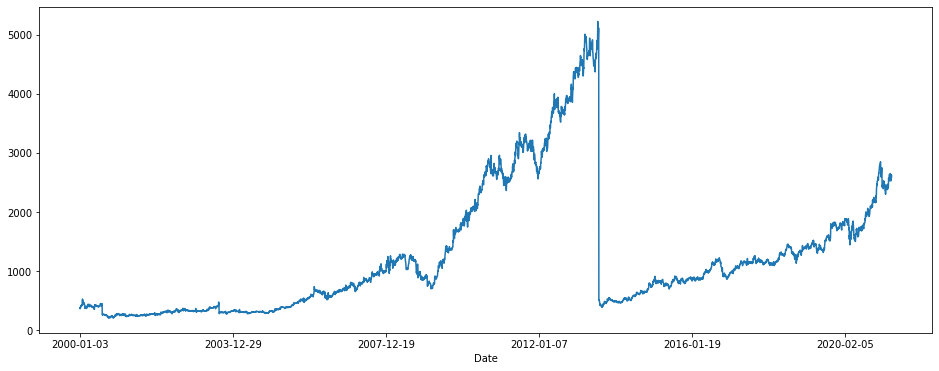

In [5]:
dataset['Open'].plot(figsize=(16,6))

In [6]:
dataset.rolling(7).mean().head(20)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,384.228571,387.485714,398.071429,382.714286,393.671429,391.942857,390.655714,21370.000000,8.733585e+11,NaN,NaN,NaN
2000-01-12,391.942857,394.628571,406.421429,388.435714,398.464286,397.085714,396.501429,24446.571429,1.004964e+12,NaN,NaN,NaN
2000-01-13,397.085714,400.771429,411.835714,393.871429,402.335714,401.821429,402.058571,25068.142857,1.033897e+12,NaN,NaN,NaN


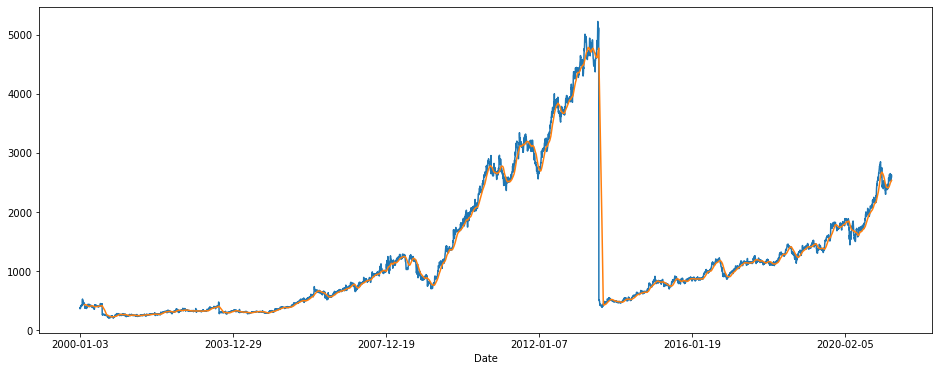

In [7]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

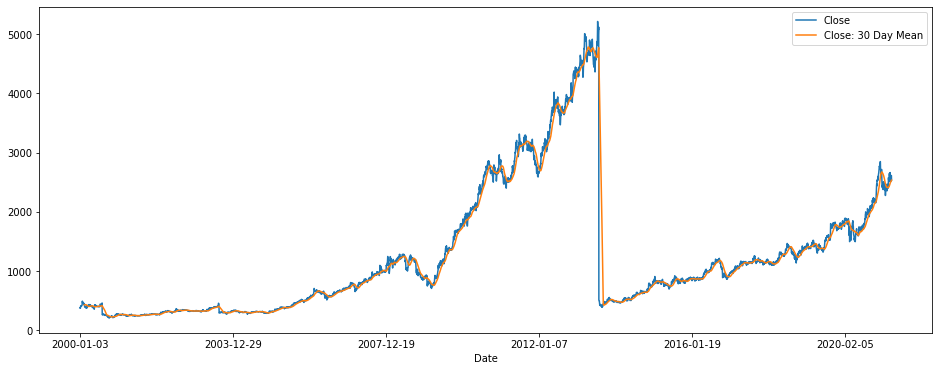

In [8]:
dataset['Close: 30 Day Mean']=dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

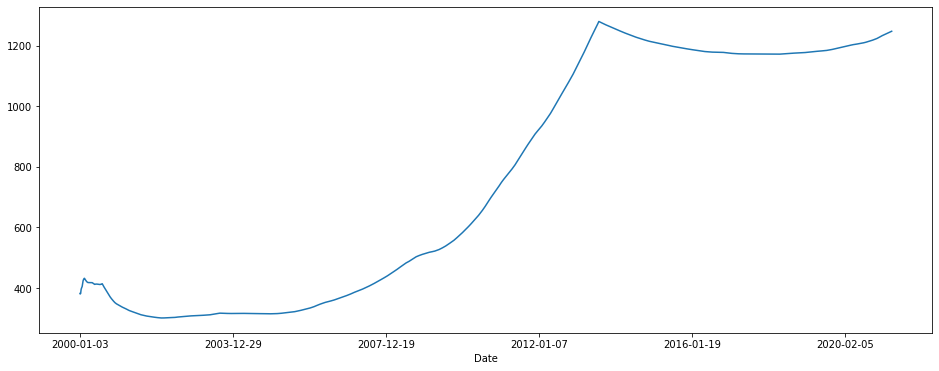

In [9]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [10]:
training_set=dataset.iloc[:,4:5].values
training_set

array([[ 390.  ],
       [ 392.  ],
       [ 390.  ],
       ...,
       [2620.25],
       [2642.  ],
       [2605.8 ]])

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
training_set=sc.fit_transform(training_set)
print(training_set)

[[0.03462838]
 [0.03502583]
 [0.03462838]
 ...
 [0.47784181]
 [0.48216415]
 [0.47497019]]


In [12]:
X_train=training_set[0:5304]
print(X_train)

[[0.03462838]
 [0.03502583]
 [0.03462838]
 ...
 [0.46884936]
 [0.46982313]
 [0.47784181]]


In [13]:
y_train=training_set[1:5305]
print(y_train)

[[0.03502583]
 [0.03462838]
 [0.03361486]
 ...
 [0.46982313]
 [0.47784181]
 [0.48216415]]


In [14]:
X_train=np.reshape(X_train,(5304,1,1))
X_train

array([[[0.03462838]],

       [[0.03502583]],

       [[0.03462838]],

       ...,

       [[0.46884936]],

       [[0.46982313]],

       [[0.47784181]]])

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(1,1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=200,batch_size=32)

Epoch 1/200
166/166 [==============================] - 7s 6ms/step - loss: 0.0447
Epoch 2/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0020
Epoch 3/200
166/166 [==============================] - 1s 7ms/step - loss: 0.0015
Epoch 4/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0013
Epoch 5/200
166/166 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 6/200
166/166 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 7/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0010
Epoch 8/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0014
Epoch 9/200
166/166 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 10/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 11/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 12/200
166/166 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 13/200


In [17]:
X_test=training_set[-50:]
X_test=np.reshape(X_test,(50,1,1))
print(X_test)

[[[0.4574225 ]]

 [[0.44899642]]

 [[0.44501192]]

 [[0.4498907 ]]

 [[0.44816176]]

 [[0.44361089]]

 [[0.43407194]]

 [[0.43593005]]

 [[0.43133943]]

 [[0.42612281]]

 [[0.42809022]]

 [[0.4345787 ]]

 [[0.43758943]]

 [[0.44102742]]

 [[0.43882154]]

 [[0.43675477]]

 [[0.44281598]]

 [[0.44321343]]

 [[0.44691971]]

 [[0.4395469 ]]

 [[0.44997019]]

 [[0.44599563]]

 [[0.44775437]]

 [[0.4408287 ]]

 [[0.44164348]]

 [[0.44081876]]

 [[0.44798291]]

 [[0.44778418]]

 [[0.45671701]]

 [[0.47052862]]

 [[0.47042925]]

 [[0.46677266]]

 [[0.46547099]]

 [[0.47779213]]

 [[0.48734102]]

 [[0.48542329]]

 [[0.48474762]]

 [[0.47580485]]

 [[0.4789845 ]]

 [[0.47253577]]

 [[0.49239865]]

 [[0.48375397]]

 [[0.47475159]]

 [[0.46527226]]

 [[0.46686208]]

 [[0.46884936]]

 [[0.46982313]]

 [[0.47784181]]

 [[0.48216415]]

 [[0.47497019]]]


In [18]:
y_test=training_set[-50:]
print(y_test)

[[0.4574225 ]
 [0.44899642]
 [0.44501192]
 [0.4498907 ]
 [0.44816176]
 [0.44361089]
 [0.43407194]
 [0.43593005]
 [0.43133943]
 [0.42612281]
 [0.42809022]
 [0.4345787 ]
 [0.43758943]
 [0.44102742]
 [0.43882154]
 [0.43675477]
 [0.44281598]
 [0.44321343]
 [0.44691971]
 [0.4395469 ]
 [0.44997019]
 [0.44599563]
 [0.44775437]
 [0.4408287 ]
 [0.44164348]
 [0.44081876]
 [0.44798291]
 [0.44778418]
 [0.45671701]
 [0.47052862]
 [0.47042925]
 [0.46677266]
 [0.46547099]
 [0.47779213]
 [0.48734102]
 [0.48542329]
 [0.48474762]
 [0.47580485]
 [0.4789845 ]
 [0.47253577]
 [0.49239865]
 [0.48375397]
 [0.47475159]
 [0.46527226]
 [0.46686208]
 [0.46884936]
 [0.46982313]
 [0.47784181]
 [0.48216415]
 [0.47497019]]


In [19]:
y_pred=regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.47036439 0.4574225 ]
 [0.46245876 0.44899642]
 [0.45870873 0.44501192]
 [0.46329933 0.4498907 ]
 [0.46167383 0.44816176]
 [0.45738828 0.44361089]
 [0.44837111 0.43407194]
 [0.45013136 0.43593005]
 [0.44577914 0.43133943]
 [0.44081926 0.42612281]
 [0.44269162 0.42809022]
 [0.44885141 0.4345787 ]
 [0.45170179 0.43758943]
 [0.45495084 0.44102742]
 [0.45286691 0.43882154]
 [0.45091206 0.43675477]
 [0.45663869 0.44281598]
 [0.45701355 0.44321343]
 [0.46050522 0.44691971]
 [0.45355248 0.4395469 ]
 [0.46337405 0.44997019]
 [0.45963526 0.44599563]
 [0.46129066 0.44775437]
 [0.45476323 0.4408287 ]
 [0.45553237 0.44164348]
 [0.45475379 0.44081876]
 [0.46150565 0.44798291]
 [0.4613187  0.44778418]
 [0.46970367 0.45671701]
 [0.48260149 0.47052862]
 [0.48250899 0.47042925]
 [0.47910133 0.46677266]
 [0.47788715 0.46547099]
 [0.48935694 0.47779213]
 [0.49821517 0.48734102]
 [0.49643788 0.48542329]
 [0.49581146 0.48474762]
 [0.48751026 0.47580485]
 [0.49046433 0.4789845 ]
 [0.48446998 0.47253577]


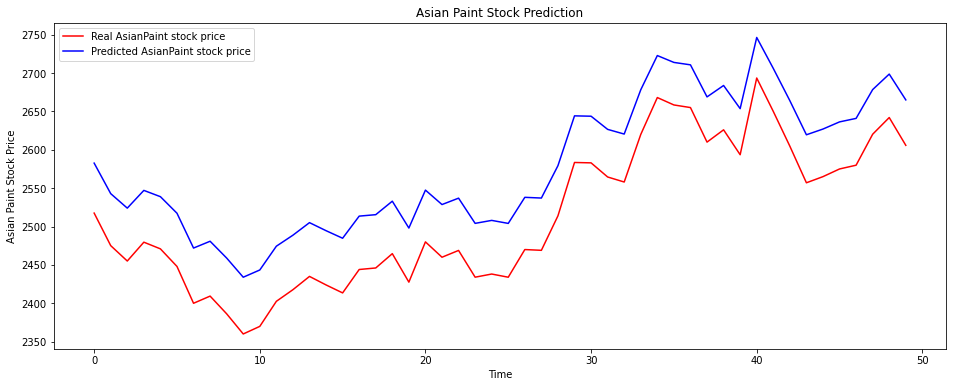

In [20]:
plt.figure(figsize=(16,6))
plt.plot(sc.inverse_transform(y_test),color='red',label='Real AsianPaint stock price')
plt.plot(sc.inverse_transform(y_pred),color='blue',label='Predicted AsianPaint stock price')
plt.title('Asian Paint Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Asian Paint Stock Price')
plt.legend()
plt.show()